# 4. Classification: machine learning methods
- Based on the feature selection in (2), we decide to keep all the variables.
- The logistic regression selection all features except for Creatinine ratio(Cr), but based on the paper below, we decided to keep it.
- Kashima, S. et al. Low serum creatinine is a type 2 diabetes risk factor in men and women: The yuport health checkup center cohort study. Diabetes Metab. 43(5), 460–464. https://doi.org/10.1016/j.diabet.2017.04.005 (2017).

In [1]:
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "/Users/zzy13/Desktop/Classes_at_UPC/Machine_learning/Project/Github/data/df_cleaned.csv"
diabetes = pd.read_csv(data_path)
print(diabetes.head())
diabetes.shape
print(diabetes['CLASS'].value_counts()[1])
print(diabetes['CLASS'].value_counts()[0])

   Unnamed: 0   ID  No_Pation  Gender       AGE      Urea        Cr     HbA1c  \
0           0  502      17975       1 -0.372449 -0.075748 -0.677683 -1.320826   
1           1  735      34221       0 -3.121433 -0.178274 -0.013078 -1.320826   
2           2  420      47975       1 -0.372449 -0.075748 -0.677683 -1.320826   
3           3  680      87656       1 -0.372449 -0.075748 -0.677683 -1.320826   
4           4  504      34223       0 -2.319646  1.154566 -0.677683 -1.320826   

       Chol        TG       HDL       LDL      VLDL       BMI  CLASS  
0 -0.500999 -1.100396  2.704556 -1.120634 -0.425626 -1.102331      0  
1 -0.901621 -0.695835 -0.156961 -0.462853 -0.386427 -1.302996      0  
2 -0.500999 -1.100396  2.704556 -1.120634 -0.425626 -1.102331      0  
3 -0.500999 -1.100396  2.704556 -1.120634 -0.425626 -1.102331      0  
4  0.059871 -1.019484 -0.817311 -0.556822 -0.464825 -1.704326      0  
757
93


In [3]:
# Split features and target
X = diabetes[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]  # Features
y = diabetes['CLASS']  # Target class

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


## 4.1 Logistic Regression

In [4]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create logistic regression model
logreg = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Print mean cross-validation score of the best model
print("Mean cross-validation score of the best model:", grid_search.best_score_)

Best parameters: {'C': 1}
Mean cross-validation score of the best model: 0.9680672268907562


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train model with best parameters
best_logreg = LogisticRegression(C=grid_search.best_params_['C'])
best_logreg.fit(X_train, y_train)

# Predict on test set
y_pred = best_logreg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9568627450980393
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.90      0.78        21
           1       0.99      0.96      0.98       234

    accuracy                           0.96       255
   macro avg       0.83      0.93      0.88       255
weighted avg       0.97      0.96      0.96       255



In [6]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred)

# 提取混淆矩阵中的四个值
TN, FP, FN, TP = conf_matrix_logreg.ravel()

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_logreg, fmt="d", annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
TN: 19 FP: 2
FN: 9 TP: 225


In [7]:

def eval_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

preds_train = eval_plot(best_logreg, X_train, y_train, name='Training')
preds_test = eval_plot(best_logreg, X_test, y_test, name='Testing')


## 4.2 Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)

print("Mean cross-validation score of the best model:", grid_search_rf.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Mean cross-validation score of the best model: 0.9882352941176471


In [9]:

best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)


y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_rep_rf)


Accuracy: 0.9764705882352941
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       1.00      0.98      0.99       234

    accuracy                           0.98       255
   macro avg       0.90      0.97      0.93       255
weighted avg       0.98      0.98      0.98       255



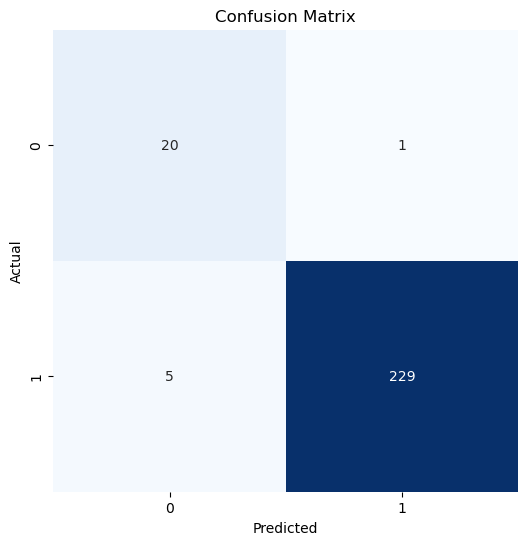

In [26]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

TN, FP, FN, TP = conf_matrix_rf.ravel()

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, fmt="d", annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 99.66%
Accuracy: 97.65%


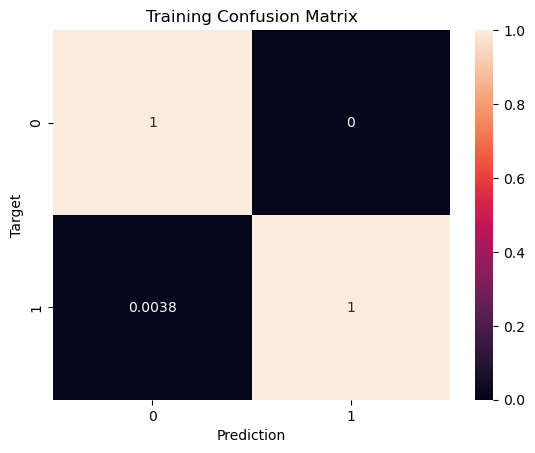

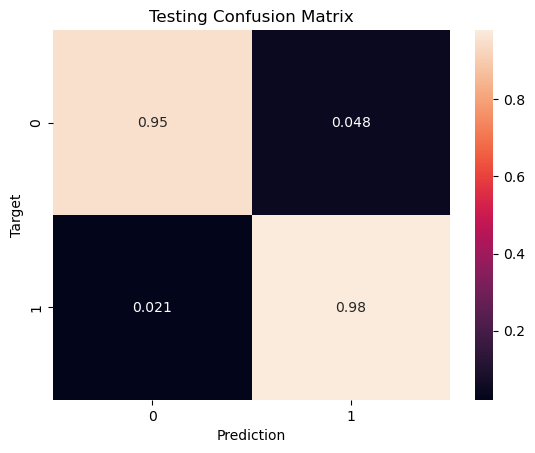

In [17]:
preds_train = eval_plot(best_rf, X_train, y_train, name='Training')
preds_test = eval_plot(best_rf, X_test, y_test, name='Testing')

## 4.3 Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'] 
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters:", grid_search_dt.best_params_)

print("Mean cross-validation score of the best model:", grid_search_dt.best_score_)

best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

y_pred_dt = best_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_rep_dt)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean cross-validation score of the best model: 0.9899159663865547
Accuracy: 0.9803921568627451
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       1.00      0.98      0.99       234

    accuracy                           0.98       255
   macro avg       0.91      0.97      0.94       255
weighted avg       0.98      0.98      0.98       255



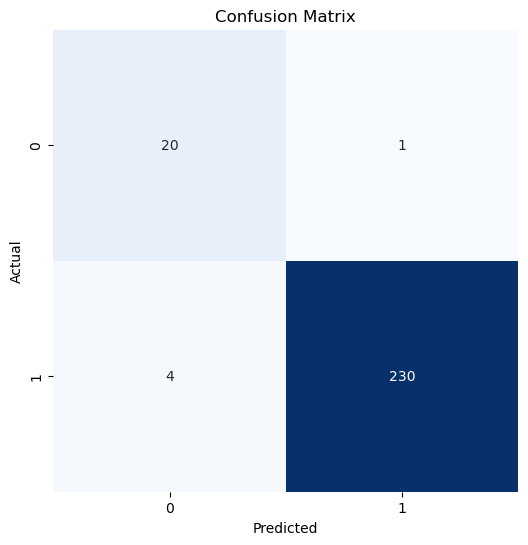

In [25]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

TN, FP, FN, TP = conf_matrix_dt.ravel()

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt, fmt="d", annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 99.83%
Accuracy: 98.04%


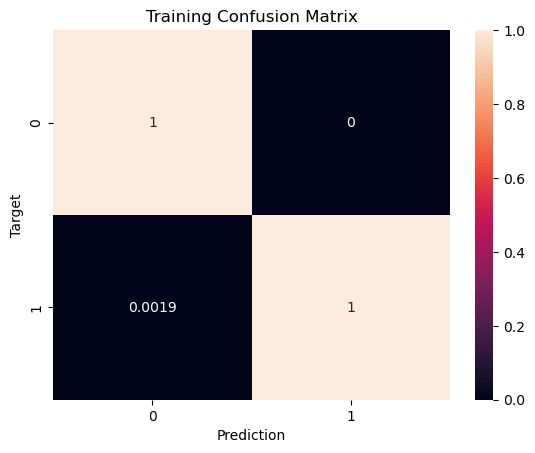

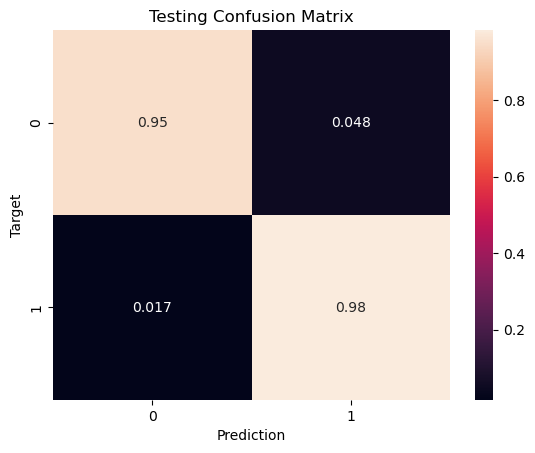

In [18]:
preds_train = eval_plot(best_dt, X_train, y_train, name='Training')
preds_test = eval_plot(best_dt, X_test, y_test, name='Testing')

## 4.4 KNN Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Best parameters:", grid_search_knn.best_params_)

print("Mean cross-validation score of the best model:", grid_search_knn.best_score_)

best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)
best_knn.fit(X_train, y_train)

y_pred_knn = best_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Classification Report:\n", classification_rep_knn)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Mean cross-validation score of the best model: 0.9697478991596638
Accuracy: 0.9647058823529412
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.98      0.98      0.98       234

    accuracy                           0.96       255
   macro avg       0.88      0.89      0.89       255
weighted avg       0.97      0.96      0.97       255



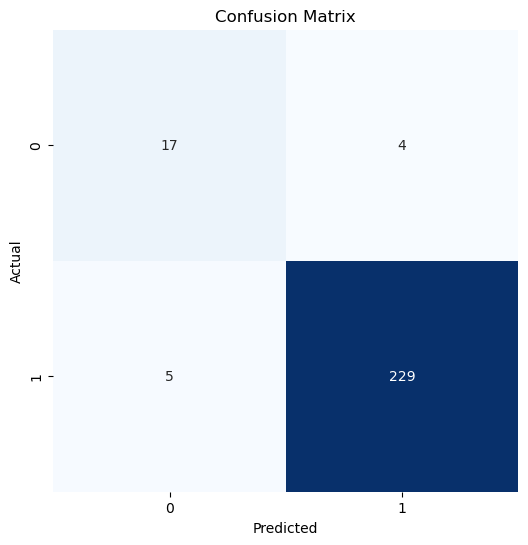

Accuracy: 100.00%
Accuracy: 96.47%


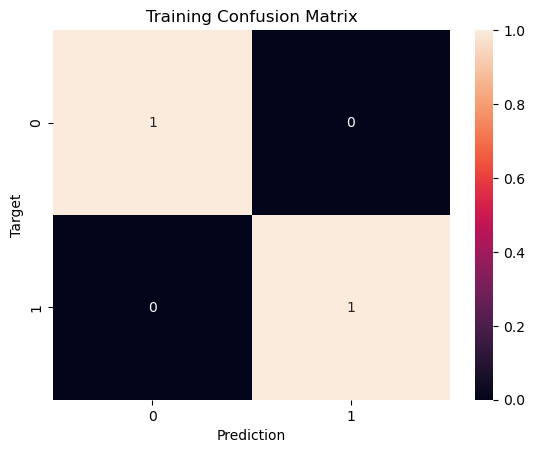

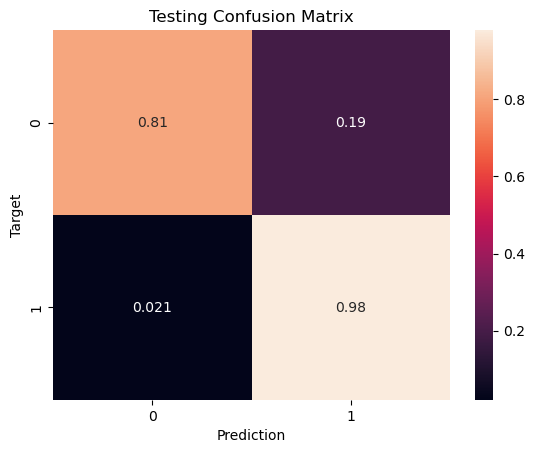

In [24]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

TN, FP, FN, TP = conf_matrix_knn.ravel()

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_knn, fmt="d", annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


preds_train = eval_plot(best_knn, X_train, y_train, name='Training')
preds_test = eval_plot(best_knn, X_test, y_test, name='Testing')

## 4.5 SVM

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("Best parameters:", grid_search_svm.best_params_)

print("Mean cross-validation score of the best model:", grid_search_svm.best_score_)

best_svm = SVC(**grid_search_svm.best_params_)
best_svm.fit(X_train, y_train)

y_pred_svm = best_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_rep_svm)


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean cross-validation score of the best model: 0.9680672268907562
Accuracy: 0.9490196078431372
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.90      0.75        21
           1       0.99      0.95      0.97       234

    accuracy                           0.95       255
   macro avg       0.81      0.93      0.86       255
weighted avg       0.96      0.95      0.95       255



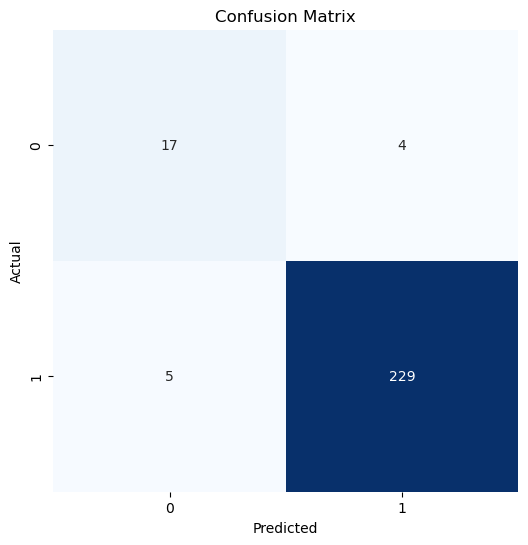

Accuracy: 97.31%
Accuracy: 94.90%


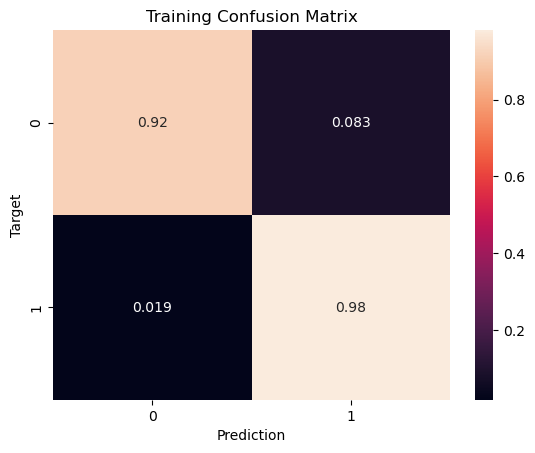

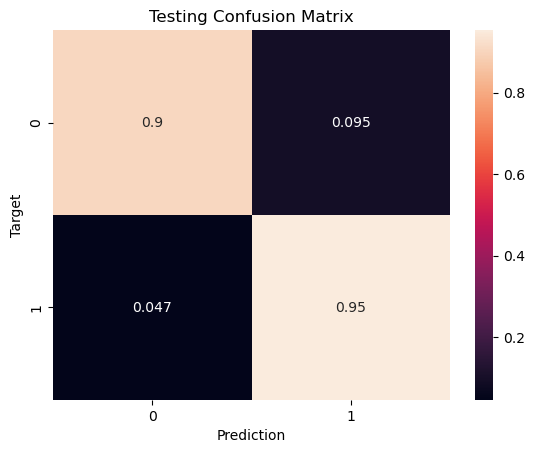

In [21]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

TN, FP, FN, TP = conf_matrix_svm.ravel()

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_svm, fmt="d", annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


preds_train = eval_plot(best_svm, X_train, y_train, name='Training')
preds_test = eval_plot(best_svm, X_test, y_test, name='Testing')

## 4.6 GradientBoostingClassifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingClassifier()

grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

print("Best parameters:", grid_search_gb.best_params_)

print("Mean cross-validation score of the best model:", grid_search_gb.best_score_)

best_gb = GradientBoostingClassifier(**grid_search_gb.best_params_)
best_gb.fit(X_train, y_train)

y_pred_gb = best_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("Accuracy:", accuracy_gb)
print("Classification Report:\n", classification_rep_gb)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean cross-validation score of the best model: 0.9915966386554622
Accuracy: 0.984313725490196
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       1.00      0.99      0.99       234

    accuracy                           0.98       255
   macro avg       0.93      0.97      0.95       255
weighted avg       0.99      0.98      0.98       255



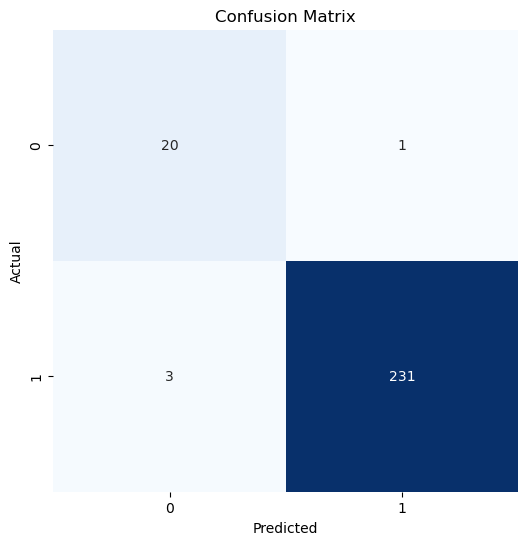

Accuracy: 100.00%
Accuracy: 98.43%


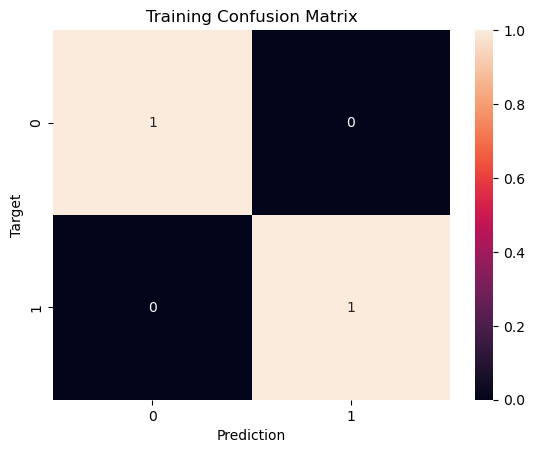

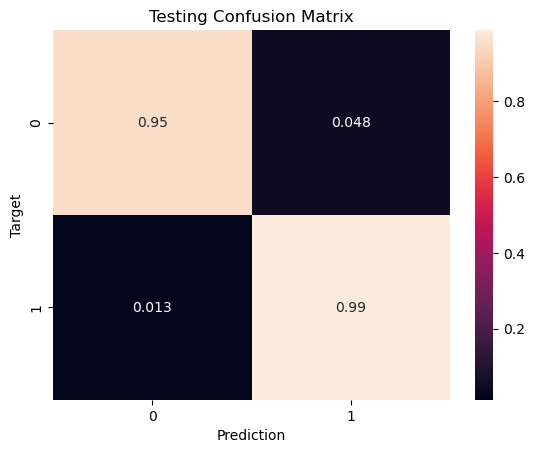

In [23]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

TN, FP, FN, TP = conf_matrix_gb.ravel()

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_gb, fmt="d", annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


preds_train = eval_plot(best_gb, X_train, y_train, name='Training')
preds_test = eval_plot(best_gb, X_test, y_test, name='Testing')

# 5. Model Selection

- GradientBoostingClassifier model has the best performance basen on the confusion matrix on the test dataset.